In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cardio_train.csv', sep = ';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
df = df.drop('id', axis = 1)

In [6]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Explatory Data Analyse

In [7]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [10]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [11]:
import seaborn as sns

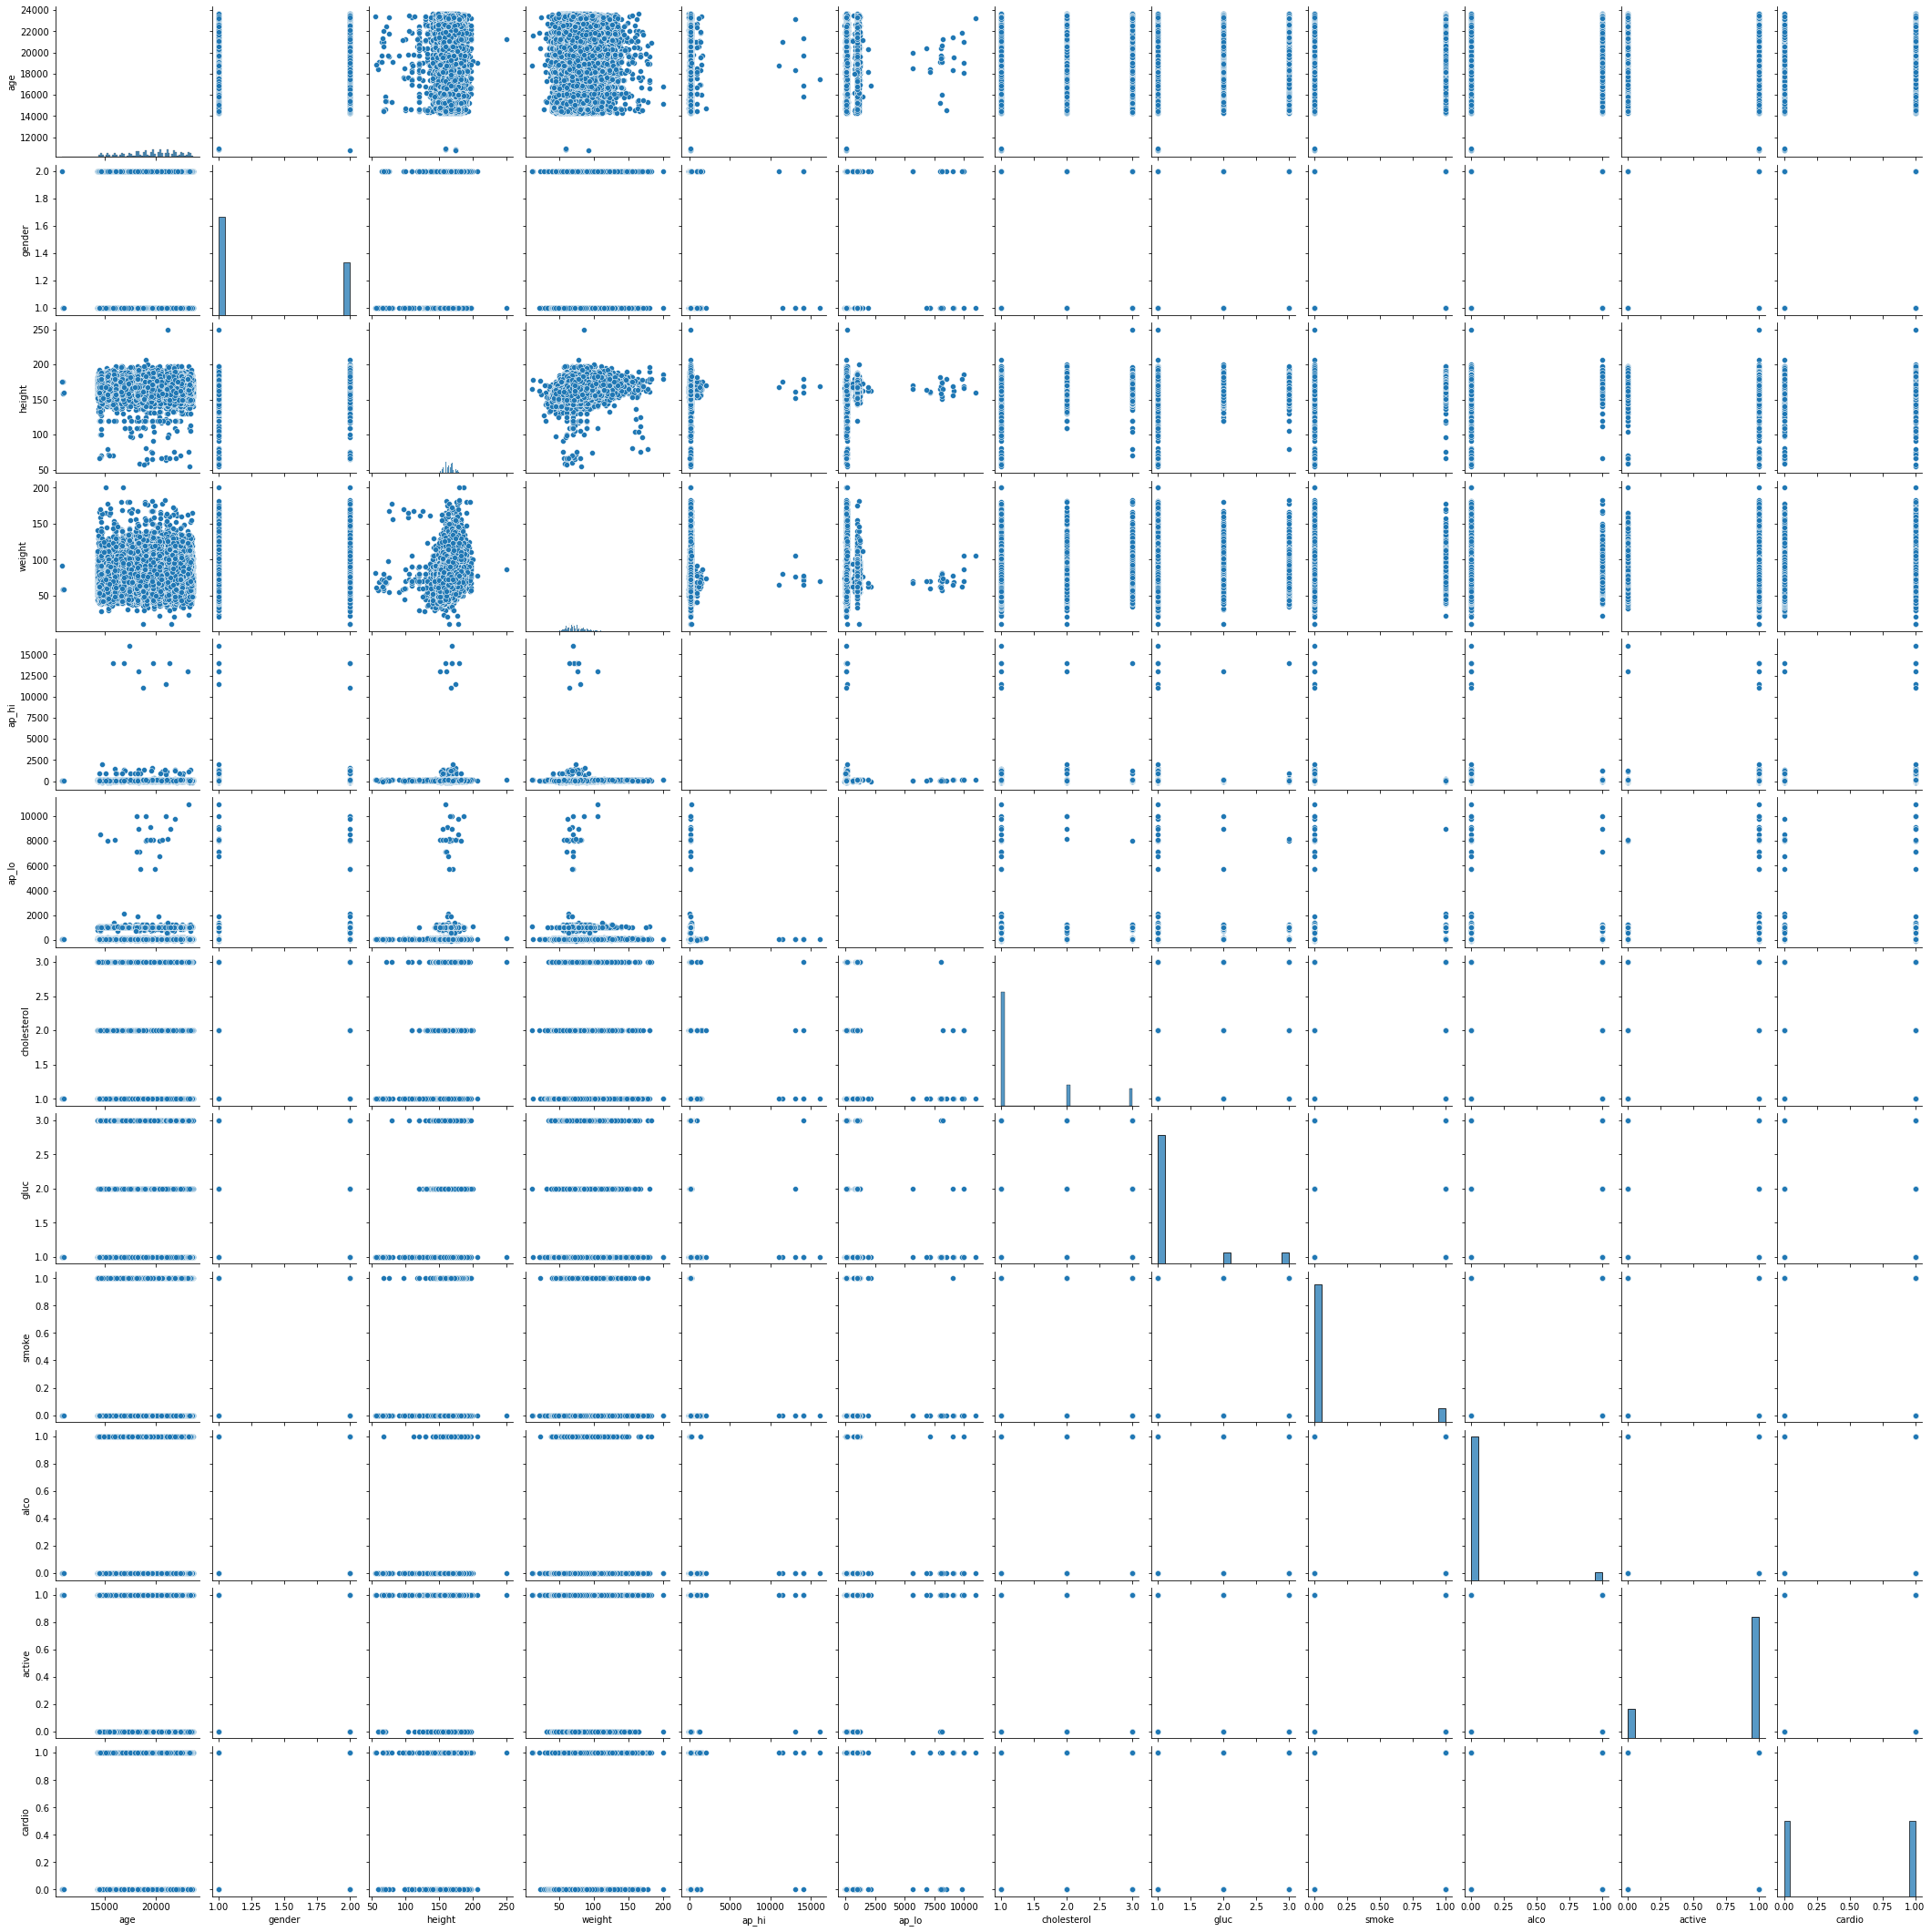

In [12]:
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

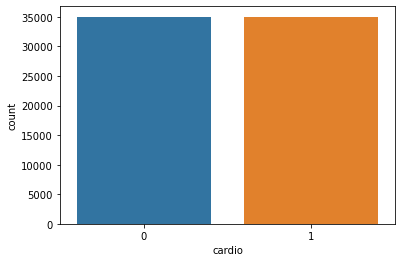

In [13]:
sns.countplot(df['cardio'])

<AxesSubplot:xlabel='gender', ylabel='count'>

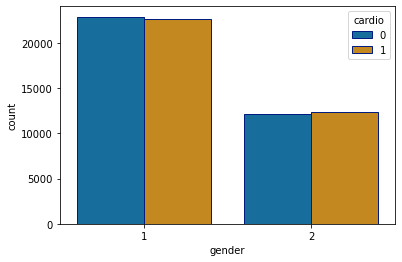

In [14]:
sns.countplot(x = 'gender', hue = 'cardio', data = df, palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1))

In [15]:
df['yr'] = (df['age']/365).round(0)

In [16]:
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

In [17]:
df.drop(['age'], axis = 1)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>,
        <AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>],
       [<AxesSubplot:title={'center':'smoke'}>,
        <AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>],
       [<AxesSubplot:title={'center':'yr'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

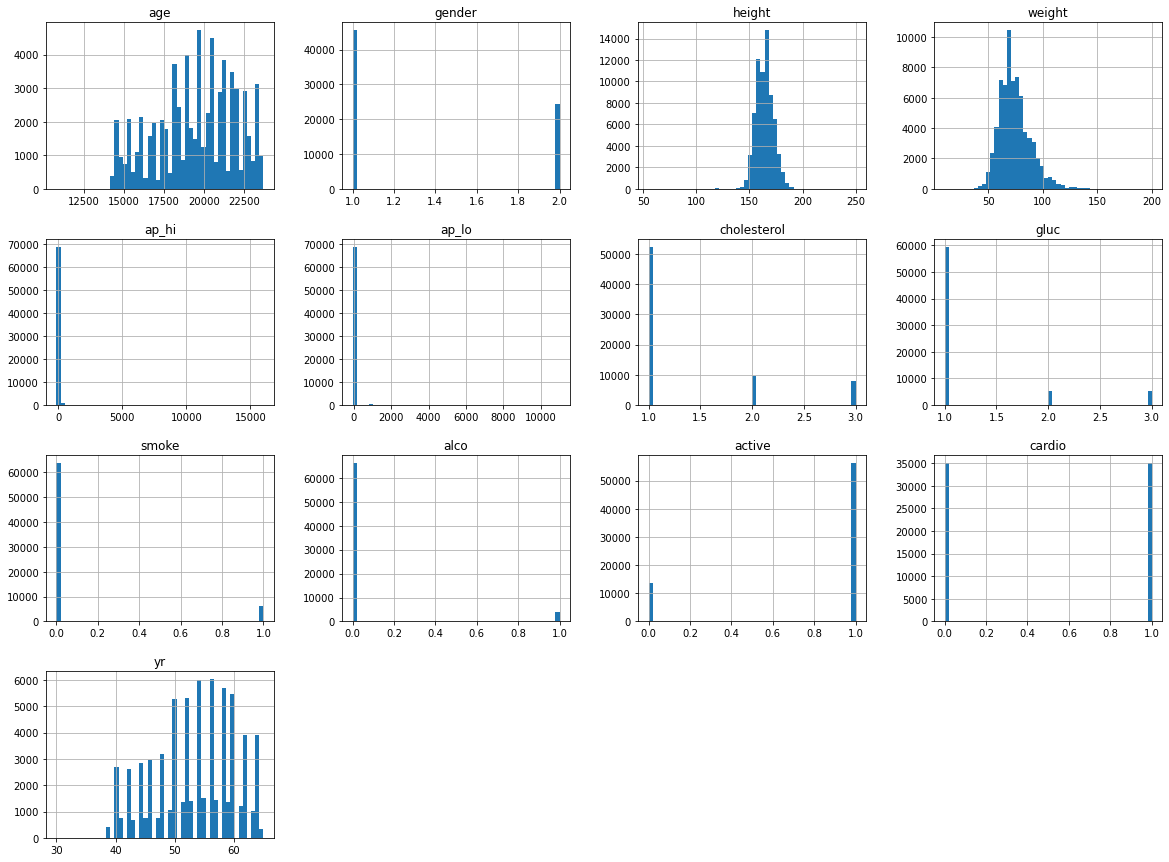

In [19]:
df.hist(bins= 50, figsize= (20, 15))

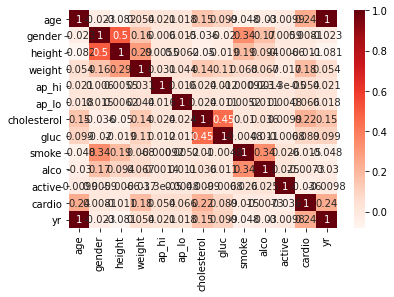

In [20]:
ax = sns.heatmap(data = df.corr(), cmap = 'Reds', annot = True)

In [21]:
x = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'yr']]

In [22]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [ ]:
y = df[['cardio']]

In [ ]:
y

# Features Selection 

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
Fit_feature = SelectKBest(score_func = f_classif)

In [ ]:
Fit_feature.fit(x, y)

In [ ]:
score_col = pd.DataFrame(Fit_feature.scores_, columns = ['score values'])

In [ ]:
score_col

In [ ]:
Name_col = pd.DataFrame(x.columns)

In [ ]:
top_features = pd.concat([Name_col, score_col], axis = 1)

In [86]:
top_features.nlargest(8, 'score values')

,0,score values
0,age,4209.007957
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494
8,smoke,16.790541


In [87]:
x = x[['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'active', 'smoke']]

In [88]:
x

,age,cholesterol,weight,gluc,ap_lo,ap_hi,active,smoke
0,18393,1,62.0,1,80,110,1,0
1,20228,3,85.0,1,90,140,1,0
2,18857,3,64.0,1,70,130,0,0
3,17623,1,82.0,1,100,150,1,0
4,17474,1,56.0,1,60,100,0,0
...,...,...,...,...,...,...,...,...
69995,19240,1,76.0,1,80,120,1,1
69996,22601,2,126.0,2,90,140,1,0
69997,19066,3,105.0,1,90,180,0,0
69998,22431,1,72.0,2,80,135,0,0


In [89]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

# Split Data set into train, test data

In [90]:
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

# RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(n_estimators = 25)

In [105]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25)

In [106]:
rfc.score(x_test, y_test)

0.7013714285714285

# Support Vector Machine

In [69]:
from sklearn.svm import SVC

In [70]:
sv = SVC()

In [107]:
sv.fit(x_train, y_train)

SVC()

In [108]:
sv.score(x_test, y_test)

0.6043428571428572

# Performances for RandomForest Classifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred = rfc.predict(x_test)

In [ ]:
accuracy_score(y_test, pred)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, pred)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test, pred)